In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Almaly district.csv')
df

,Year,Population,District Population,Migration,Birth,Death
0,2000,1 130 439,181 478,NaN,NaN,NaN
1,2001,1 128 759,178 017,NaN,NaN,NaN
2,2002,1 132 424,174 932,NaN,NaN,NaN
3,2003,1 149 641,172 706,-27.0,"3,468","2,249"
4,2004,1 175 208,172 412,94.0,"3,885","2,337"
5,2005,1 209 485,174 793,168.0,"3,669","2,159"
6,2006,1 247 896,177 722,48.0,"3,788","1,799"
7,2007,1 287 246,179 101,11.0,"4,146","1,797"
8,2008,1 324 739,183 101,14.0,"5,006","1,883"
9,2009,1 361 877,188 847,-35.0,"4,111","1,198"


In [5]:
df = df.dropna()
df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
df['Birth'] = df['Birth'].astype(str).str.replace(',', '.').astype(float)
df['Death'] = df['Death'].astype(str).str.replace(',', '.').astype(float)


df

/tmp/ipykernel_4918/3957259955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_4918/3957259955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_4918/3957259955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Year,Population,District Population,Migration,Birth,Death
3,2003,1149641,172706,-27.0,3.468,2.249
4,2004,1175208,172412,94.0,3.885,2.337
5,2005,1209485,174793,168.0,3.669,2.159
6,2006,1247896,177722,48.0,3.788,1.799
7,2007,1287246,179101,11.0,4.146,1.797
8,2008,1324739,183101,14.0,5.006,1.883
9,2009,1361877,188847,-35.0,4.111,1.198
10,2010,1390610,188245,18.0,2.738,1.733
11,2011,1413152,187099,70.0,1.462,635.000
12,2012,1449366,195149,-68.0,2.739,544.000


/tmp/ipykernel_4918/4135771294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


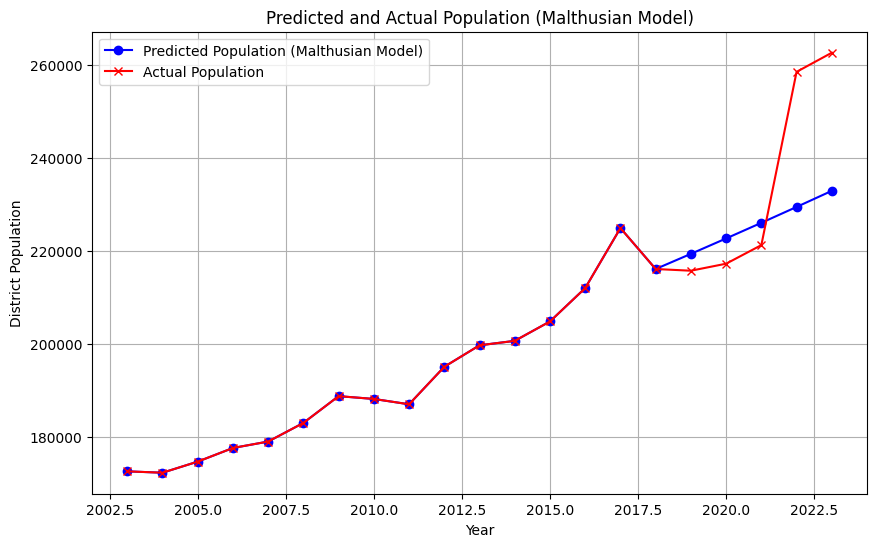

MSE: 356963826.73581916
R2: 0.18198160784492268


In [6]:
from sklearn.metrics import mean_squared_error, r2_score
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
y_train = df[df.index.year <= 2018]['District Population']
y_test = df[df.index.year > 2018]['District Population']


def malthusian_model(P0, r, t):
    return P0 * np.exp(r * t)


P0 = y_train.iloc[0]
r_values = []

for i in range(1, len(y_train)):
    r = np.log(y_train.iloc[i] / y_train.iloc[i-1])
    r_values.append(r)

r_mean = np.mean(r_values)


years_test = np.arange(2019, 2024) - 2018
predicted_population_malthus = malthusian_model(y_train.iloc[-1], r_mean, years_test)


if len(y_test) == len(predicted_population_malthus):
    
    mse_malthus = mean_squared_error(y_test, predicted_population_malthus)
    r2_malthus = r2_score(y_test, predicted_population_malthus)

    
    years_full = np.arange(2003, 2024)
    population_full_malthus = np.concatenate((y_train.values, predicted_population_malthus))

    plt.figure(figsize=(10, 6))
    plt.plot(years_full, population_full_malthus, marker='o', linestyle='-', color='b', label='Predicted Population (Malthusian Model)')
    plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
    plt.xlabel('Year')
    plt.ylabel('District Population')
    plt.title('Predicted and Actual Population (Malthusian Model)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'MSE: {mse_malthus}')
    print(f'R2: {r2_malthus}')
else:
    print("Error: The sizes of the predicted and test datasets do not match.")


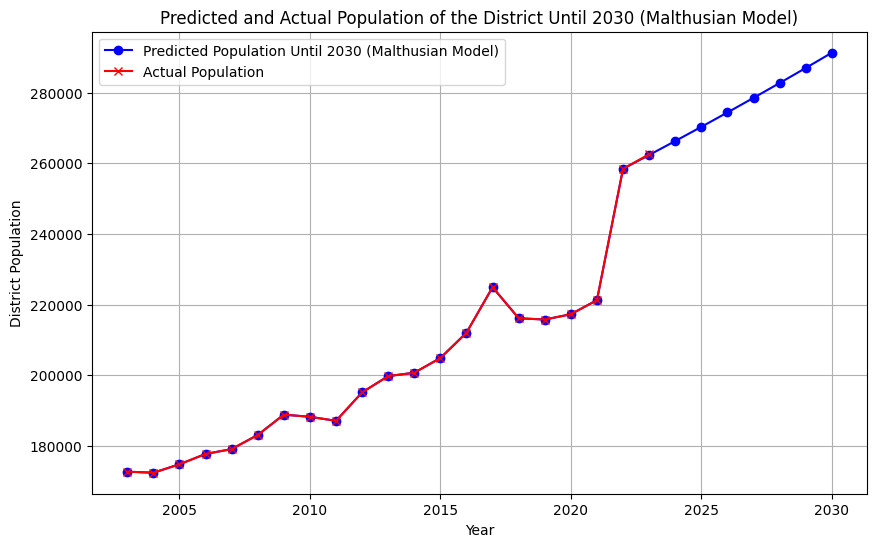

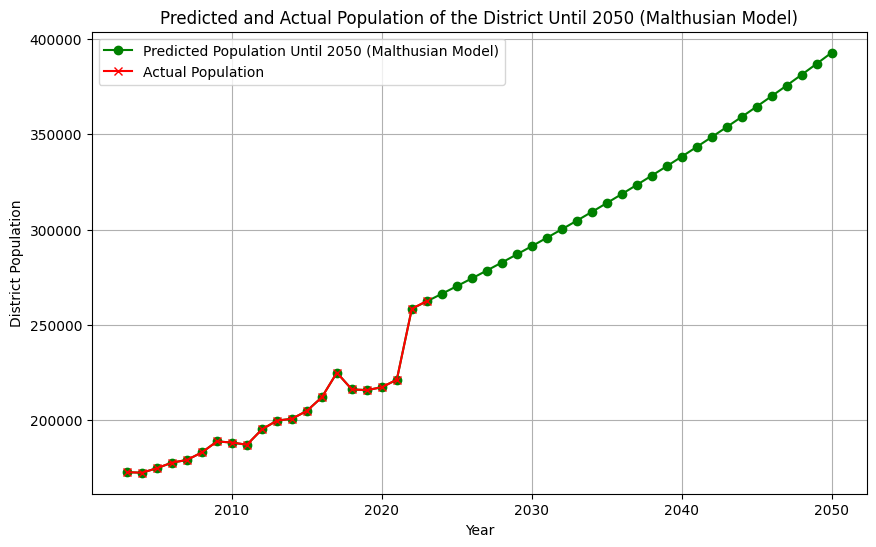

In [8]:
y_train_2030 = df[df.index.year <= 2022]['District Population']
y_test_2030 = df[df.index.year > 2022]['District Population']

years_2030 = np.arange(2023, 2031) - 2022
years_2050 = np.arange(2023, 2051) - 2022

predicted_population_malthus_2030 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2030)
predicted_population_malthus_2050 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2050)


years_full_2030 = np.arange(2003, 2031)
years_full_2050 = np.arange(2003, 2051)

population_full_malthus_2030 = np.concatenate((y_train_2030.values, predicted_population_malthus_2030))
population_full_malthus_2050 = np.concatenate((y_train_2030.values, predicted_population_malthus_2050))

# Chart Until 2030
plt.figure(figsize=(10, 6))
plt.plot(years_full_2030, population_full_malthus_2030, marker='o', linestyle='-', color='b', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()

# Chart Until 2050
plt.figure(figsize=(10, 6))
plt.plot(years_full_2050, population_full_malthus_2050, marker='o', linestyle='-', color='g', label='Predicted Population Until 2050 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the District Until 2050 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
forecast_years_2050 = np.arange(2023, 2051)
forecast_df_2050 = pd.DataFrame({
    'Year': forecast_years_2050,
    'Predicted District Population': predicted_population_malthus_2050
})

print("\nПрогноз населения до 2050 года с использованием модели Мальтуса:")
print(forecast_df_2050)


Прогноз населения до 2050 года с использованием модели Мальтуса:
    Year  Predicted District Population
0   2023                  262341.674032
1   2024                  266294.008598
2   2025                  270305.887453
3   2026                  274378.207667
4   2027                  278511.879827
5   2028                  282707.828235
6   2029                  286966.991121
7   2030                  291290.320849
8   2031                  295678.784130
9   2032                  300133.362241
10  2033                  304655.051242
11  2034                  309244.862198
12  2035                  313903.821407
13  2036                  318632.970628
14  2037                  323433.367318
15  2038                  328306.084861
16  2039                  333252.212814
17  2040                  338272.857150
18  2041                  343369.140502
19  2042                  348542.202417
20  2043                  353793.199611
21  2044                  359123.306225
22  2045      

In [10]:
last_year = df.index.year[-1]
steps_2024 = 2024 - last_year
steps_2030 = 2030 - last_year
steps_2050 = 2050 - last_year

/home/agytai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


15:37:41 - cmdstanpy - INFO - Chain [1] start processing
15:37:41 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


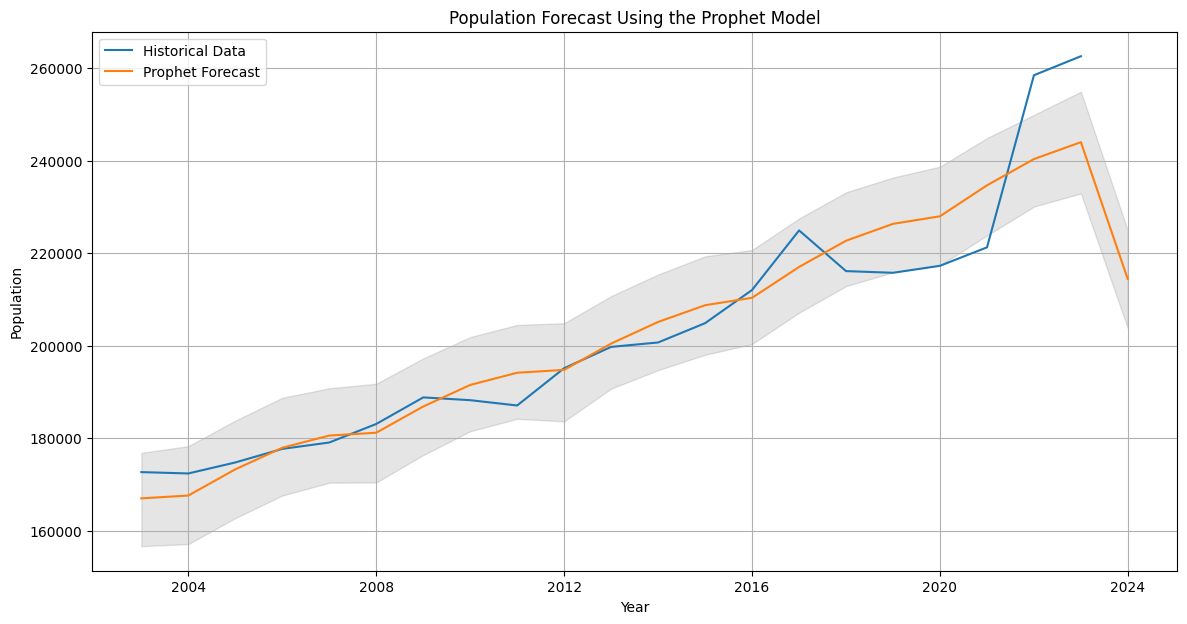

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2024, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast Using the Prophet Model')
plt.legend()
plt.grid(True)
plt.show()


15:38:33 - cmdstanpy - INFO - Chain [1] start processing


15:38:33 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


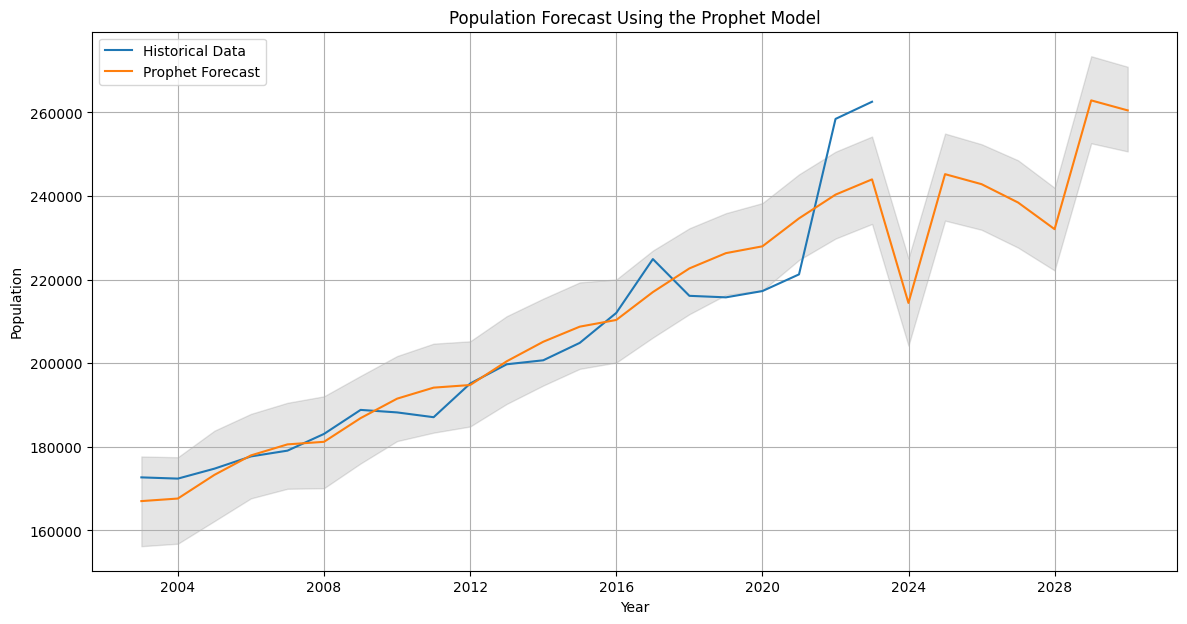

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2030, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


15:39:10 - cmdstanpy - INFO - Chain [1] start processing


15:39:10 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


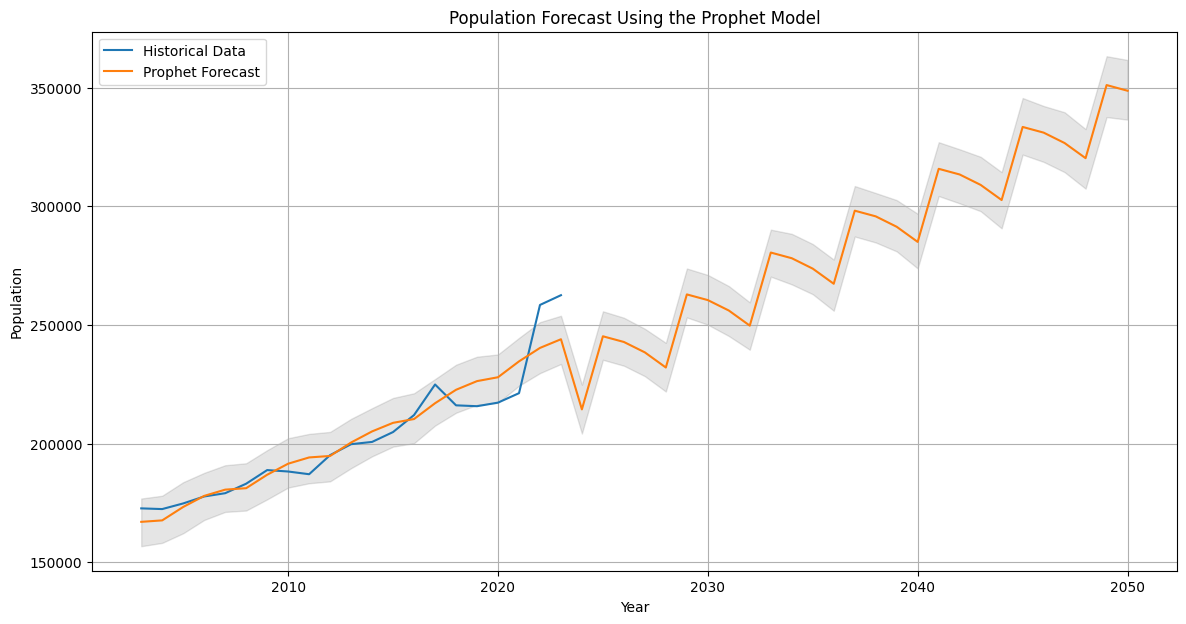

In [13]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2050, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted and Actual Population of the District Until 2050 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:

forecast_df_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df_prophet = forecast_df_prophet.rename(columns={'ds': 'Year', 'yhat': 'Predicted Population', 'yhat_lower': 'Lower Bound', 'yhat_upper': 'Upper Bound'})


forecast_df_prophet = forecast_df_prophet[forecast_df_prophet['Year'].dt.year <= 2050]


forecast_df_prophet['Year'] = forecast_df_prophet['Year'].dt.year
forecast_df_prophet.set_index('Year', inplace=True)


print(forecast_df_prophet.head(30))  


      Predicted Population    Lower Bound    Upper Bound
Year                                                    
2003         167030.977592  156755.048452  176854.582372
2004         167643.533336  158155.769974  178038.728639
2005         173311.990684  162218.370522  183748.773445
2006         177966.903011  167812.495930  187675.831442
2007         180600.135043  171204.648874  190886.770856
2008         181212.690799  171787.461407  191717.593170
2009         186881.223153  176491.184455  197235.465787
2010         191536.381700  181470.804074  202270.153750
2011         194172.509578  183287.828624  204101.003488
2012         194794.535454  184079.014648  204933.498540
2013         200476.932296  189641.406488  210439.839705
2014         205147.440991  194632.471745  214940.432401
2015         208758.718359  198723.455567  219247.929744
2016         210360.061477  200169.358002  221225.735850
2017         217028.190298  207591.912008  227207.182707
2018         222690.213616  212

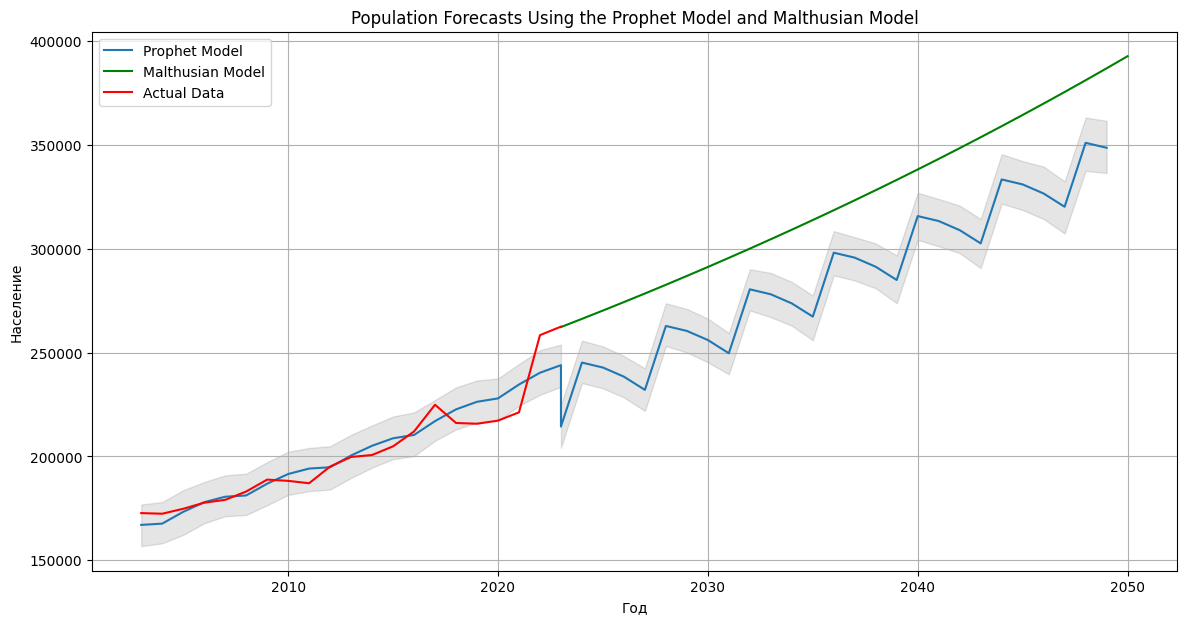

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(forecast_df_prophet.index, forecast_df_prophet['Predicted Population'], label='Prophet Model')
plt.fill_between(forecast_df_prophet.index, forecast_df_prophet['Lower Bound'], forecast_df_prophet['Upper Bound'], color='k', alpha=0.1)


plt.plot(forecast_df_2050['Year'], forecast_df_2050['Predicted District Population'], label='Malthusian Model', color='green')
plt.plot(df.index.year, df['District Population'], label='Actual Data', color='red')


plt.xlabel('Год')
plt.ylabel('Население')
plt.title('Population Forecasts Using the Prophet Model and Malthusian Model')
plt.legend()
plt.grid(True)
plt.show()
